<a href="https://colab.research.google.com/github/Jake-LJH/ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA1 - Titanic Assignment

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


In [ ]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Drop id, name, ticket, fare, cabin
train = train.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,1,female,47.0,1,1,S
1,1,1,male,26.0,0,0,C
2,1,1,female,42.0,0,0,C
3,1,1,female,29.0,0,0,S
4,0,1,male,25.0,0,0,C


In [ ]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [ ]:
#Seperate features from target (Label)

x = train.drop('Survived', axis=1)
y = train['Survived']

print(x.head())
print(y.head())

print('\n ** Missing Values ** \n\n', train.isnull().sum())

   Pclass     Sex   Age  SibSp  Parch Embarked
0       1  female  47.0      1      1        S
1       1    male  26.0      0      0        C
2       1  female  42.0      0      0        C
3       1  female  29.0      0      0        S
4       1    male  25.0      0      0        C
0    1
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

 ** Missing Values ** 

 Survived      0
Pclass        0
Sex           0
Age         173
SibSp         0
Parch         0
Embarked      2
dtype: int64


In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Create Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = x.select_dtypes(include=['int64','float64']).columns
cat_cols = x.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(  steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('onhot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
                   ('num', numeric_transformer, num_cols),
                   ('cat', categorical_transformer, cat_cols)
    ]
)

In [ ]:
# Creating estimator
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( algorithm='auto', 
                            leaf_size=30,
                            metric='minkowski', 
                            metric_params=None,
                            n_jobs=None, 
                            n_neighbors=13, 
                            p=2,
                            weights='uniform')

In [ ]:
main_pipeline = Pipeline(
    steps = [
             ('preprocessor', preprocessor),  
             ('classifier', knn)   
    ]
)

#Training of the model

In [ ]:
main_pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

#Validation and Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns


Report : 
              precision    recall  f1-score   support

           Y       0.85      0.87      0.86       114
           N       0.76      0.73      0.74        66

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180



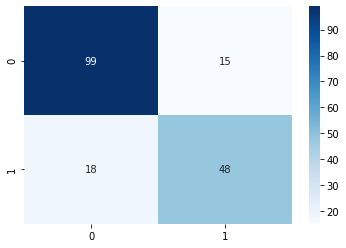

In [ ]:
y_pred = main_pipeline.predict(x_test)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

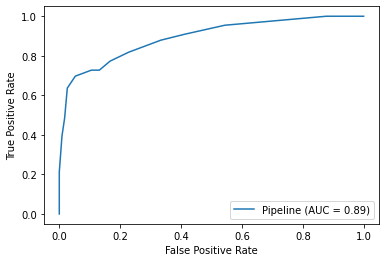

In [ ]:
#ROC Curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

roc_disp = plot_roc_curve(main_pipeline, x_test, y_test)

In [ ]:
# Saving the model
import pickle
pickle.dump(main_pipeline, open('loan pred pipeline.pkl','wb'))

#HyperTuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameters to hypertune for KNeighborClassifier

n_neighbors_param = list(range(3,17,2))
#print(n_neighbors_param)
leaf_size_param = list(range(30,60,10))
weights_param = ['uniform','distance']
algorithm_param = ['auto','ball_tree','kd_tree','brute']

# Pack these parameters into a dictionary

grid_param_knn = [
  {
      'classifier__n_neighbors' : n_neighbors_param,
      'classifier__weights'     : weights_param,
      'classifier__algorithm'   : algorithm_param,
      'classifier__leaf_size'   : leaf_size_param,
  }
]

gs_knn_pipeline = GridSearchCV(estimator=main_pipeline,
                               param_grid = grid_param_knn,
                               scoring = 'accuracy',
                               cv = 10
                               )
# Fit the GridSearchCV to find the best model form the hyperparameter tuning
gs_models = gs_knn_pipeline.fit(X_train, Y_train)

In [ ]:
gs_models.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

Report : 
              precision    recall  f1-score   support

           Y       0.85      0.87      0.86       114
           N       0.76      0.73      0.74        66

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180



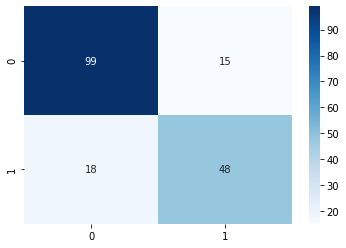

In [ ]:
y_pred = gs_models.best_estimator_.predict(x_test)

#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

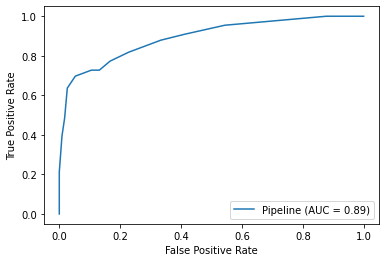

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

roc_disp = plot_roc_curve(gs_models.best_estimator_, x_test, y_test)